# AIDI 1000 - Assignment 02.

# Q1: Health Canada sets an action level for mercury in fish at 1 ppm (part per million). 

If mercury levels are higher than this value in commercial fish, then Health Canada will take action to impose a moratorium on fishing in the area where the fish are harvested.

Recently, there have been concerns about mercury levels in walleye fish populating the portion of the Athabasca River that is down stream from Whitecourt, where local First Nations harvest walleye as part of a commercial fishing operation.

A biologist randomly picked n=31 walleye from a recent commercial fishing catch downstream from Whitecourt and measured the mercury (in ppm) from each walleye. 

The ppms, are provided below.
1.2, 1.1, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 0.9, 1.1, 1.1, 1.2, 1.0, 1.1, 1.0, 1.1, 1.0, 0.9, 1.0, 1.0, 1.1, 1.0, 1.0, 1.1, 1.2, 1.0, 1.1, 1.0, 1.0, 1.2, 1.1


Part (a): Establish a statistical hypothesis. (2 points)

Part (b): Using a 5% significance level, perform a suitable Hypothesis analysis that allows the biologist to see if mercury levels in walleye fish harvested from the Athabasca River (downstream of Whitecourt) exceed Heath Canada’s action level. (14 points)

Part (c): In the context of your statistical hypotheses in part (a), explain both a Type I Error and a Type II Error. (2 points)

Part (d): Do these data suggest that Health Canada should place a moratorium on commercial walleye fishing on the Athabasca River downstream of Whitecourt? (2 points)

Part (e): In your finding, interpret the meaning of the p-value you have computed. (2 points)

Part (f): If you reject the null hypothesis, provide a 95% confidence interval for the mean mercury (in ppm) of walleye found downstream from Whitecourt. (8 points)

# Answer : 

In [1]:
import numpy as np
from scipy import stats

## Part (a): Establish a statistical hypothesis.

The null hypothesis (H0) is that the mean mercury level in walleye fish harvested from the Athabasca River downstream of Whitecourt is equal to or less than 1 ppm.

The alternative hypothesis (H1) is that the mean mercury level in walleye fish harvested from the Athabasca River downstream of Whitecourt is greater than 1 ppm.

## Part (b): Hypothesis testing using a 5% significance level.

Let's perform hypothesis testing:

In [2]:
# ppms Data
ppms_levels = np.array([1.2, 1.1, 1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 0.9, 1.1, 
                           1.1, 1.2, 1.0, 1.1, 1.0, 1.1, 1.0, 0.9, 1.0, 1.0, 
                           1.1, 1.0, 1.0, 1.1, 1.2, 1.0, 1.1, 1.0, 1.0, 1.2, 1.1])

# Calculate sample mean and standard deviation
sample_mean = np.mean(ppms_levels)
sample_std = np.std(ppms_levels, ddof=1)  # using ddof=1 for sample standard deviation
print("Sample mean : ", sample_mean)
print("Sample standard deviation : ", sample_std)

# Population mean under the null hypothesis
mu0 = 1

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(ppms_levels, mu0, alternative='greater')

# Print results
print("T-statistic:", t_stat)
print("p-value:", p_value)
print("A lower p-value indicates stronger evidence against the null hypothesis.")

Sample mean :  1.0516129032258066
Sample standard deviation :  0.08112117578838661
T-statistic: 3.5424595421603904
p-value: 0.0006595483478614145
A lower p-value indicates stronger evidence against the null hypothesis.


## Part (c): Explanation of Type I and Type II Errors:

Type I error is rejecting the null hypothesis when it is actually true. In this case, it means assuming that the average mercury level in walleye fish is greater than 1 ppm when it is not.

Type II error occurs when the null hypothesis is not rejected despite being erroneous. In this case, it means failing to infer that the mean mercury level in walleye fish exceeds 1 ppm when it actually is.


## Part (d): Conclusion on whether to impose a moratorium

This can be decided based on the p-value obtained from the hypothesis test.


## Part (e): Interpretation of p-value

The p-value indicates the probability of seeing the results or more extreme data if the null hypothesis is true. 

If the p-value is less than the threshold for significance (0.05), we reject the null hypothesis.



## Part (f): Confidence interval for the mean mercury level

When we reject the null hypothesis, then that will produce a 95% confidence interval for the average mercury level.

In [3]:
# Part (b)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to suggest mercury levels exceed 1 ppm.")
    print("Health Canada should consider placing a moratorium.", "\n")
    
    # Calculate 95% confidence interval for the mean
    n = len(ppms_levels)
    mean = np.mean(ppms_levels)
    std_err = np.std(ppms_levels, ddof=1) / np.sqrt(n)
    margin_of_error = stats.t.ppf(0.975, df=n-1) * std_err
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    print("95% confidence interval for the mean mercury level is :", confidence_interval)
    
else:
    print("Fail to reject the null hypothesis. Mean mercury level in walleye fish is not greater than 1 ppm.")
    

Reject the null hypothesis.
There is sufficient evidence to suggest mercury levels exceed 1 ppm.
Health Canada should consider placing a moratorium. 

95% confidence interval for the mean mercury level is : (1.0218574157196536, 1.0813683907319596)


# 

# Q2: Use the Gradient Descent algorithm to find the x1 and x2 values that minimize the function:
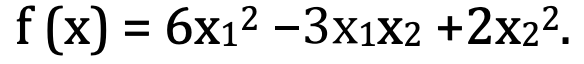

Choose the starting point as (x1, x2) = (2,3) and use the α as 0.1 and ε as 0.0001.
Note 1: If you are using python, continue the iterations until you achieve convergence. Report the values (x1,
x2) after performing Gradient Descent each time.
Note 2: If you are solving manually and you achieve the convergence in less than 5 iterations, it is fine,
otherwise, stop once you are done 5 iterations and report the values (x1, x2) after performing Gradient
Descent each time. (25 points)

In [4]:
# Define the function f(x)
def f(x1, x2):
    return 6*x1**2 - 3*x1*x2 + 2*x2**2

# Define the partial derivatives of f(x) with respect to x1 and x2
def df_dx1(x1, x2):
    return 12*x1 - 3*x2

def df_dx2(x1, x2):
    return -3*x1 + 4*x2

x1 = 2
x2 = 3


alpha = 0.1
epsilon = 0.0001

delta_x1 = delta_x2 = float('inf')

# Initialize the number of iterations
iterations = 0

print("Iteration".ljust(16), "x1".ljust(10), "x2")

# Perform Gradient Descent until convergence
while max(abs(delta_x1), abs(delta_x2)) > epsilon:
    gradient_x1 = df_dx1(x1, x2)
    gradient_x2 = df_dx2(x1, x2)
    
    new_x1 = x1 - alpha * gradient_x1
    new_x2 = x2 - alpha * gradient_x2
    
    delta_x1 = abs(new_x1 - x1)
    delta_x2 = abs(new_x2 - x2)
    
    x1 = new_x1
    x2 = new_x2
    
    iterations += 1
    
    # Print the current values of x1 and x2
    print("".ljust(4),str(iterations).ljust(10), str(round(x1, 4)).ljust(10),  str(round(x2, 4)))

# Print the final result
print("\nOptimization complete.")
print(f"Minimum point found at (x1, x2) = ({x1:.4f}, {x2:.4f})")


Iteration        x1         x2
     1          0.5        2.4
     2          0.62       1.59
     3          0.353      1.14
     4          0.2714     0.7899
     5          0.1827     0.5554
     6          0.1301     0.388
     7          0.0904     0.2718
     8          0.0635     0.1902
     9          0.0444     0.1332
     10         0.0311     0.0932
     11         0.0217     0.0653
     12         0.0152     0.0457
     13         0.0107     0.032
     14         0.0075     0.0224
     15         0.0052     0.0157
     16         0.0037     0.011
     17         0.0026     0.0077
     18         0.0018     0.0054
     19         0.0013     0.0038
     20         0.0009     0.0026
     21         0.0006     0.0018
     22         0.0004     0.0013
     23         0.0003     0.0009
     24         0.0002     0.0006
     25         0.0001     0.0004
     26         0.0001     0.0003
     27         0.0001     0.0002

Optimization complete.
Minimum point found at (x1, x2) = (0.

# 

# Q3: Show that AI = IA = A, where,
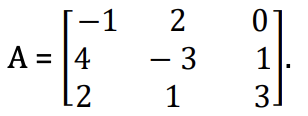
(5 points) 

In [5]:
A = np.array([[-1, 2, 0],[4, -3, 1],[2, 1, 3]])

# Define the identity matrix
I = np.identity(3)

# Compute AI
AI = np.dot(A, I)

# Compute IA
IA = np.dot(I, A)

# Check if AI = IA = A
print("AI:")
print(AI)
print("\nIA:")
print(IA)
print("\nA:")
print(A)

# Check if AI = A and IA = A
print("\nAI == A:", np.array_equal(AI, A))
print("IA == A:", np.array_equal(IA, A))


AI:
[[-1.  2.  0.]
 [ 4. -3.  1.]
 [ 2.  1.  3.]]

IA:
[[-1.  2.  0.]
 [ 4. -3.  1.]
 [ 2.  1.  3.]]

A:
[[-1  2  0]
 [ 4 -3  1]
 [ 2  1  3]]

AI == A: True
IA == A: True


# 

# Q4: Find the eigenvalue and eigenvectors of the following matrix,
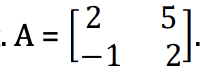 (15 points)

In [6]:
A = np.array([[2, 5],
              [-1, 2]])

# Step 1: Find the eigenvalues using NumPy
eigenvalues = np.linalg.eigvals(A)

print("Eigenvalues:")
print("λ1 =", eigenvalues[0])
print("λ2 =", eigenvalues[1])


# Step 2: Find the eigenvectors using NumPy
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nEigenvectors for above mentions eigenvalues :")
print("v1 =", eigenvectors[:, 0])
print("v2 =", eigenvectors[:, 1])


Eigenvalues:
λ1 = (2+2.23606797749979j)
λ2 = (2-2.23606797749979j)

Eigenvectors for above mentions eigenvalues :
v1 = [0.91287093+0.j         0.        +0.40824829j]
v2 = [0.91287093-0.j         0.        -0.40824829j]


Eigenvalues:
These eigenvalues are complex numbers, indicating that the matrix has a pair of complex conjugate eigenvalues.

Eigenvectors:
These eigenvectors correspond to the respective complex eigenvalues. The eigenvectors are also complex, indicating that the eigenvectors corresponding to complex eigenvalues can have both real and imaginary components.

Overall, the results show that the supplied matrix has complex eigenvalues and eigenvectors, particularly those having non-real entries or non-symmetric structures.
